In [2]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [3]:
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [6]:
y.head(30)

1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
dtype: bool

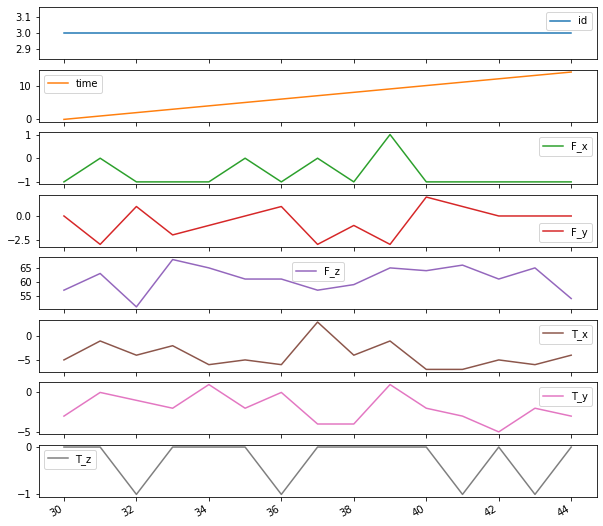

In [21]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show();

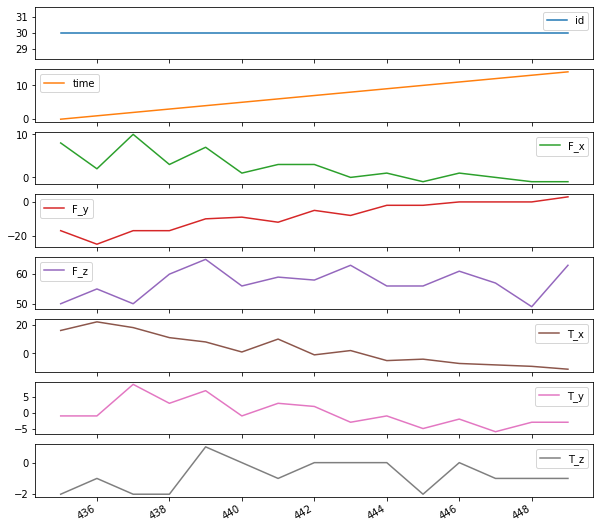

In [7]:
timeseries[timeseries['id'] == 30].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [8]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 10/10 [00:39<00:00,  3.93s/it]


In [13]:
extracted_features

,T_z__variance_larger_than_standard_deviation,T_z__has_duplicate_max,T_z__has_duplicate_min,T_z__has_duplicate,T_z__sum_values,T_z__abs_energy,T_z__mean_abs_change,T_z__mean_change,T_z__mean_second_derivative_central,T_z__median,...,T_y__fourier_entropy__bins_2,T_y__fourier_entropy__bins_3,T_y__fourier_entropy__bins_5,T_y__fourier_entropy__bins_10,T_y__fourier_entropy__bins_100,T_y__permutation_entropy__dimension_3__tau_1,T_y__permutation_entropy__dimension_4__tau_1,T_y__permutation_entropy__dimension_5__tau_1,T_y__permutation_entropy__dimension_6__tau_1,T_y__permutation_entropy__dimension_7__tau_1
1,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.376770,0.735622,0.900256,1.386294,2.079442,1.230932,1.863680,2.271869,2.302585,2.197225
2,0.0,1.0,1.0,1.0,-4.0,4.0,0.285714,0.000000,0.038462,0.0,...,0.562335,1.039721,1.494175,1.732868,2.079442,1.585771,2.369382,2.397895,2.302585,2.197225
3,0.0,1.0,1.0,1.0,-4.0,4.0,0.571429,0.000000,0.038462,0.0,...,0.693147,0.974315,1.320888,1.906155,2.079442,1.671595,2.253858,2.397895,2.302585,2.197225
4,0.0,0.0,1.0,1.0,-5.0,7.0,0.500000,0.071429,-0.038462,0.0,...,0.661563,1.039721,1.320888,1.732868,1.906155,1.671595,2.253858,2.397895,2.302585,2.197225
5,0.0,1.0,1.0,1.0,-2.0,6.0,0.357143,-0.071429,0.000000,0.0,...,0.562335,1.039721,1.039721,1.732868,2.079442,1.671595,2.253858,2.397895,2.302585,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,0.0,0.0,1.0,-232.0,4988.0,3.428571,-1.000000,-0.115385,-21.0,...,0.562335,0.562335,1.073543,1.386294,1.906155,1.498569,2.094729,2.271869,2.302585,2.197225
85,1.0,0.0,1.0,1.0,-52.0,250.0,0.500000,-0.500000,0.038462,-2.0,...,0.562335,0.562335,1.073543,1.494175,2.079442,1.524707,2.253858,2.397895,2.302585,2.197225
86,1.0,0.0,1.0,1.0,-81.0,885.0,1.785714,1.071429,0.269231,-8.0,...,0.376770,0.376770,0.376770,0.376770,1.073543,0.271189,0.286836,0.304636,0.325083,0.348832
87,1.0,1.0,0.0,1.0,475.0,16513.0,2.500000,2.214286,-0.076923,35.0,...,0.376770,0.735622,0.735622,0.735622,1.073543,0.830518,1.118743,1.294545,1.497866,1.581094


In [9]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

/Users/aderemifayoyiwa/opt/anaconda3/envs/virtual_env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['T_z__partial_autocorrelation__lag_7'
 'T_z__partial_autocorrelation__lag_8'
 'T_z__partial_autocorrelation__lag_9' ...
 'T_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"min"'
 'T_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


In [14]:
features_filtered 

,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",T_y__abs_energy,F_z__standard_deviation,...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7
1,14.0,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,...,0.000000,0.0,-3.0,1.0,-0.751682,-0.310265,-1.0,-5.960000e+02,-1.0,-1.0
2,7.0,25.0,13.0,76.0,2.054805,4.222222,0.624118,6.020261,90.0,4.333846,...,0.000000,1.0,-9.2,1.0,0.057818,-0.202951,-3.6,-6.803846e+02,-1.0,-1.0
3,11.0,12.0,14.0,40.0,1.768867,3.128889,2.203858,8.235442,103.0,4.616877,...,0.000000,3.0,-6.6,0.0,0.912474,0.539121,-4.0,-6.170000e+02,-1.0,0.0
4,5.0,16.0,10.0,60.0,2.669998,7.128889,0.844394,12.067855,124.0,3.833188,...,0.000000,0.0,-9.0,0.0,-0.609735,-2.641390,-4.6,3.426308e+03,-1.0,1.0
5,9.0,17.0,13.0,46.0,2.039608,4.160000,2.730599,6.445330,180.0,4.841487,...,0.000000,0.0,-9.6,0.0,0.072771,0.591927,-5.0,-2.609000e+03,-1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,0.0,42780.0,39.541483,1563.528889,359.248162,309.190088,171261.0,291.988082,...,64.000000,46.0,203.2,0.0,71.641254,38.559593,36.4,-7.700628e+07,-105.0,66.8
85,0.0,1683.0,0.0,1523.0,3.841296,14.755556,36.770027,26.631007,503.0,14.501494,...,4.666667,4.5,-41.6,0.0,16.349699,14.429645,1.0,-1.050785e+04,5.8,10.6
86,0.0,83497.0,0.0,21064.0,52.807154,2788.595556,312.044052,429.697740,118013.0,121.420189,...,0.250000,7.0,-84.8,0.0,71.095480,60.760842,19.6,-5.544922e+06,30.4,38.4
87,0.0,1405437.0,0.0,308658.0,80.098162,6415.715556,481.046930,683.196535,2430295.0,204.966621,...,0.000000,90.5,-139.2,0.0,173.699573,109.029954,272.6,-9.881845e+07,246.8,154.8


In [10]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 10/10 [00:39<00:00,  3.91s/it]


In [15]:
features_filtered_direct

,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__variance,T_y__standard_deviation,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",T_y__abs_energy,F_z__standard_deviation,...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7
1,14.0,14.0,15.0,13.0,0.222222,0.471405,1.000000,1.165352,10.0,1.203698,...,0.000000,0.0,-3.0,1.0,-0.751682,-0.310265,-1.0,-5.960000e+02,-1.0,-1.0
2,7.0,25.0,13.0,76.0,4.222222,2.054805,0.624118,6.020261,90.0,4.333846,...,0.000000,1.0,-9.2,1.0,0.057818,-0.202951,-3.6,-6.803846e+02,-1.0,-1.0
3,11.0,12.0,14.0,40.0,3.128889,1.768867,2.203858,8.235442,103.0,4.616877,...,0.000000,3.0,-6.6,0.0,0.912474,0.539121,-4.0,-6.170000e+02,-1.0,0.0
4,5.0,16.0,10.0,60.0,7.128889,2.669998,0.844394,12.067855,124.0,3.833188,...,0.000000,0.0,-9.0,0.0,-0.609735,-2.641390,-4.6,3.426308e+03,-1.0,1.0
5,9.0,17.0,13.0,46.0,4.160000,2.039608,2.730599,6.445330,180.0,4.841487,...,0.000000,0.0,-9.6,0.0,0.072771,0.591927,-5.0,-2.609000e+03,-1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,0.0,42780.0,1563.528889,39.541483,359.248162,309.190088,171261.0,291.988082,...,64.000000,46.0,203.2,0.0,71.641254,38.559593,36.4,-7.700628e+07,-105.0,66.8
85,0.0,1683.0,0.0,1523.0,14.755556,3.841296,36.770027,26.631007,503.0,14.501494,...,4.666667,4.5,-41.6,0.0,16.349699,14.429645,1.0,-1.050785e+04,5.8,10.6
86,0.0,83497.0,0.0,21064.0,2788.595556,52.807154,312.044052,429.697740,118013.0,121.420189,...,0.250000,7.0,-84.8,0.0,71.095480,60.760842,19.6,-5.544922e+06,30.4,38.4
87,0.0,1405437.0,0.0,308658.0,6415.715556,80.098162,481.046930,683.196535,2430295.0,204.966621,...,0.000000,90.5,-139.2,0.0,173.699573,109.029954,272.6,-9.881845e+07,246.8,154.8
